In [ ]:
import pandas as pd

In [ ]:
fail_df = pd.read_csv("/content/sample_data/PdM_failures.csv")
print(fail_df.shape)
fail_df.head()

(761, 3)


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
error_df = pd.read_csv("/content/sample_data/PdM_errors.csv")
print(error_df.shape)
error_df.head()

(3919, 3)


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [ ]:
tele_df = pd.read_csv("/content/sample_data/PdM_telemetry.csv")
print(tele_df.shape)
tele_df.head()

(876100, 6)


,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [ ]:
machines_df = pd.read_csv("/content/sample_data/PdM_machines.csv")
print(machines_df.shape)
machines_df.head()

(100, 3)


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [ ]:
tele_df['datetime_new'] = pd.to_datetime(
    tele_df['datetime'],
    format="%Y-%m-%d %H:%M:%S"
)

fail_df['datetime_new'] = pd.to_datetime(
    fail_df['datetime'],
    format="%Y-%m-%d %H:%M:%S"
)

error_df['datetime_new'] = pd.to_datetime(
    error_df['datetime'],
    format="%Y-%m-%d %H:%M:%S"
)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
print(machines_df['machineID'].unique())
print(machines_df['model'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
['model3' 'model4' 'model2' 'model1']


In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=machines_df.loc[machines_df['model'] == 'model1', 'age'], name='model1'))
fig.add_trace(go.Histogram(
    x=machines_df.loc[machines_df['model'] == 'model2', 'age'], name='model2'))
fig.add_trace(go.Histogram(
    x=machines_df.loc[machines_df['model'] == 'model3', 'age'], name='model3'))
fig.add_trace(go.Histogram(
    x=machines_df.loc[machines_df['model'] == 'model4', 'age'], name='model4',))
fig.update_layout(xaxis_title='Age', yaxis_title='Count', template='plotly_dark')
fig.update_layout(barmode='stack', title='Machine Age Distribution')
fig.show()

In [ ]:
machine_id = tele_df['machineID'].unique()
tele_dfs = []

def sort_by_date(df, col):
    return df.sort_values(by=col)

for ID in machine_id:
    temp_df = tele_df[tele_df['machineID']==ID]
    temp_df = sort_by_date(temp_df, 'datetime_new')
    tele_dfs.append(temp_df)

print("Total machines = " + str(len(tele_dfs)))

Total machines = 100


In [ ]:
machine_id = tele_df['machineID'].unique()
fail_dfs, error_dfs = [],[]

def sort_by_date(df, col):
    return df.sort_values(by=col)

for ID in machine_id:
    fail_temp = fail_df[fail_df['machineID']==ID]
    error_temp = error_df[error_df['machineID']==ID]
    fail_temp = sort_by_date(fail_temp, 'datetime_new')
    error_temp = sort_by_date(error_temp, 'datetime_new')
    fail_dfs.append(fail_temp)
    error_dfs.append(error_temp)

print("No. of Machines fail dfs = " + str(len(fail_dfs)))
print("No. of Machines error dfs = " + str(len(error_dfs)))

No. of Machines fail dfs = 100
No. of Machines error dfs = 100


In [ ]:
max_length = max(len(sublist) for sublist in fail_dfs)
print("Maximum length of lists:", max_length)

max_length_index = max((len(sublist), index) for index, sublist in enumerate(fail_dfs))[1]
print("Index of sublist with maximum length:", max_length_index)

Maximum length of lists: 19
Index of sublist with maximum length: 98


In [ ]:
len(fail_dfs[98])

19

In [ ]:
trace = go.Scatter(x=tele_dfs[98]['datetime_new'], y=tele_dfs[98]['volt'], mode='lines', name='Voltage')
trace_dots = go.Scatter(x=fail_dfs[98]['datetime_new'], mode='markers', name='failures', marker=dict(size=10, color='red'))

fig = go.Figure(data=[trace,trace_dots])

fig.update_layout(
    title = "d Failures with voltage variations",
    xaxis_title = "Date",
    yaxis_title = "Voltage level"
)

fig.show()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
import numpy as np
fail_98 = fail_dfs[98]
fail_98['count'] = np.ones(len(fail_dfs[98]))
fail_98_ = fail_98[['datetime_new', 'count']]

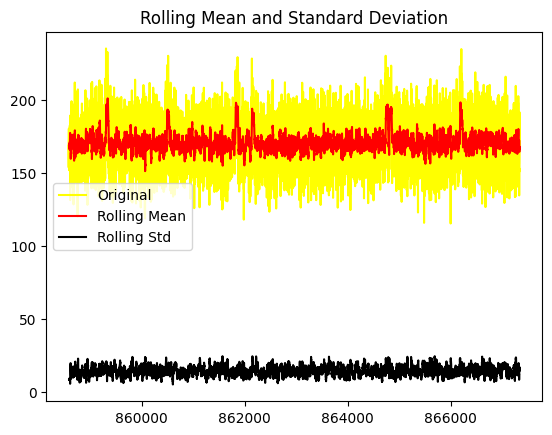

Results of dickey fuller test
Test Statistics               -1.291853e+01
p-value                        3.919167e-24
No. of lags used               2.700000e+01
Number of observations used    8.733000e+03
critical value (1%)           -3.431099e+00
critical value (5%)           -2.861871e+00
critical value (10%)          -2.566946e+00
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(tele_dfs[98]['volt'])

The null hypothesis of the ADF test is that the time series is non-stationary. In our case, if P Value < 0.05. Thus the series doesn't need differencing.

In [ ]:
fail_98_.head()

,datetime_new,count
739,2015-01-02 03:00:00,1.0
740,2015-01-18 06:00:00,1.0
741,2015-02-02 06:00:00,1.0
742,2015-02-17 06:00:00,1.0
743,2015-03-04 06:00:00,1.0


In [ ]:
ts_failures_monthly = fail_98_.resample('M', on='datetime_new').sum()

In [ ]:
ts_failures_daily = fail_98_.resample('D', on='datetime_new').sum()

In [ ]:
ts_failures_monthly

,count
datetime_new,
2015-01-31,2.0
2015-02-28,2.0
2015-03-31,2.0
2015-04-30,2.0
2015-05-31,2.0
2015-06-30,1.0
2015-07-31,2.0
2015-08-31,2.0
2015-09-30,0.0


In [ ]:
hist_monthly_failures = ts_failures_monthly['count'].cumsum()
hist_monthly_failures

datetime_new
2015-01-31     2.0
2015-02-28     4.0
2015-03-31     6.0
2015-04-30     8.0
2015-05-31    10.0
2015-06-30    11.0
2015-07-31    13.0
2015-08-31    15.0
2015-09-30    15.0
2015-10-31    17.0
2015-11-30    18.0
2015-12-31    19.0
Freq: M, Name: count, dtype: float64

In [ ]:
hist_monthly_failures['2015-01-31']

2.0

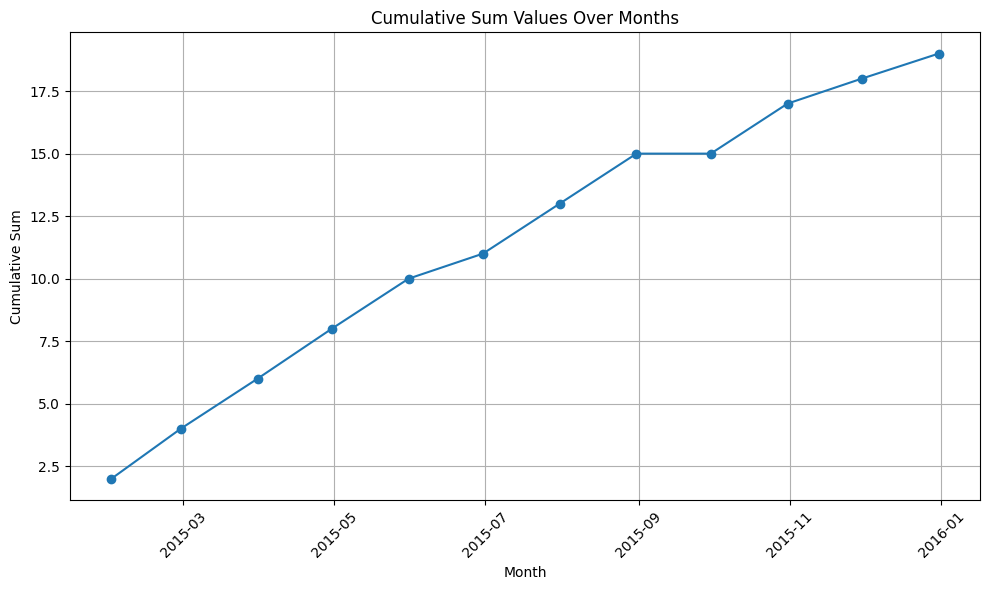

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(hist_monthly_failures.index, hist_monthly_failures.values, marker='o', linestyle='-')
plt.title('Cumulative Sum Values Over Months')
plt.xlabel('Month')
plt.ylabel('Cumulative Sum')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install statsmodels
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.5 MB/s eta 0:00:00


In [ ]:
#ts_failures_daily['count_for_month'] = ts_failures_daily.rename(columns={'count_for_month': 'daily_count'})

In [ ]:
ts_failures_daily.head()

,count
datetime_new,
2015-01-02,1.0
2015-01-03,0.0
2015-01-04,0.0
2015-01-05,0.0
2015-01-06,0.0


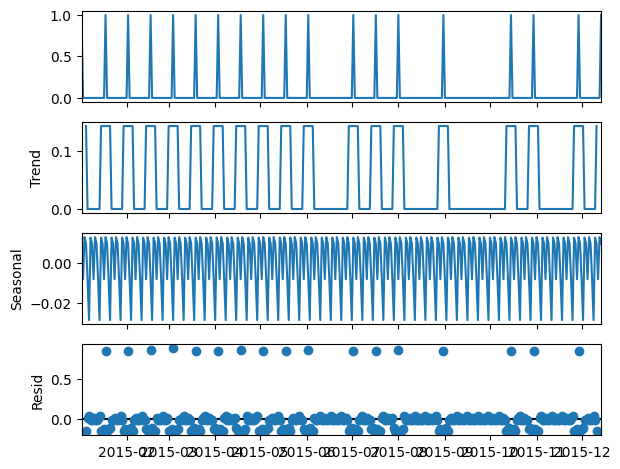

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('default')
result = seasonal_decompose(ts_failures_daily, model='additive')
result.plot()
pyplot.show()

In [ ]:
fail_dfs[98]['failure'].unique()

array(['comp3', 'comp4', 'comp1', 'comp2'], dtype=object)

In [ ]:
temp_fail_df = fail_dfs[98]

In [ ]:
temp_fail_df.head()

,datetime,machineID,failure,datetime_new,count
739,2015-01-02 03:00:00,99,comp3,2015-01-02 03:00:00,1.0
740,2015-01-18 06:00:00,99,comp4,2015-01-18 06:00:00,1.0
741,2015-02-02 06:00:00,99,comp1,2015-02-02 06:00:00,1.0
742,2015-02-17 06:00:00,99,comp2,2015-02-17 06:00:00,1.0
743,2015-03-04 06:00:00,99,comp3,2015-03-04 06:00:00,1.0


In [ ]:
temp_fail_df = temp_fail_df.drop(columns=['datetime'])

In [ ]:
temp_fail_df.head()

,machineID,failure,datetime_new,count
739,99,comp3,2015-01-02 03:00:00,1.0
740,99,comp4,2015-01-18 06:00:00,1.0
741,99,comp1,2015-02-02 06:00:00,1.0
742,99,comp2,2015-02-17 06:00:00,1.0
743,99,comp3,2015-03-04 06:00:00,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
labenc=LabelEncoder()
temp_fail_df.iloc[:,1]=labenc.fit_transform(temp_fail_df.iloc[:,1].values) + 1

<ipython-input-34-e2d81703a008>:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [ ]:
temp_fail_df = temp_fail_df.drop(columns=['machineID'])

In [ ]:
comp_failures_98 = pd.DataFrame()
comp_failures_98[['datetime_new', 'failure']] = temp_fail_df[['datetime_new', 'failure']]

In [ ]:
comp_failures_98.head()

,datetime_new,failure
739,2015-01-02 03:00:00,3
740,2015-01-18 06:00:00,4
741,2015-02-02 06:00:00,1
742,2015-02-17 06:00:00,2
743,2015-03-04 06:00:00,3


In [ ]:
comp_failures_98 = fail_98_.resample('D', on='datetime_new').sum()

In [ ]:
tele_df_98 = tele_dfs[98]

In [ ]:
combined_data_98 = pd.merge(tele_df_98, comp_failures_98, on='datetime_new', how='left')

combined_data_98.head()



,datetime,machineID,volt,rotate,pressure,vibration,datetime_new,failure
0,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,2015-01-01 06:00:00,NaN
1,2015-01-01 07:00:00,99,153.667693,441.288719,128.011446,39.271527,2015-01-01 07:00:00,NaN
2,2015-01-01 08:00:00,99,178.319255,512.612661,128.526147,42.975412,2015-01-01 08:00:00,NaN
3,2015-01-01 09:00:00,99,162.163821,493.356626,114.435754,40.044016,2015-01-01 09:00:00,NaN
4,2015-01-01 10:00:00,99,180.201336,550.512296,110.771891,43.054530,2015-01-01 10:00:00,NaN


In [ ]:
# # Fill NaN values with 0 indicating no failure
combined_data_98['failure'] = combined_data_98['failure'].fillna(0)

In [ ]:
combined_data_98['failure'].unique()

array([0., 3., 4., 1., 2.])

In [ ]:
type(combined_data_98['datetime_new'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# # Prepare data
# X = combined_data_98[['volt', 'rotate', 'pressure', 'vibration']]  # Features
# y = combined_data_98['failure']  # Target variable

X=combined_data_98
size= int(len(X)*0.75)
train, test = X[0:size], X[size:len(X)]

In [ ]:
def evaluate_arima_model(train, test, arima_order):
  # make predictions
  model = ARIMA(endog=train['failure'], exog=train[['volt', 'rotate', 'pressure', 'vibration']], order=arima_order)
  model_fit = model.fit()
  y_pred = model_fit.forecast(steps=len(test), exog=test[['volt', 'rotate', 'pressure', 'vibration']])
  # calculate out of sample error
  error = mean_squared_error(test['failure'], y_pred)
  return error

In [ ]:
def evaluate_models(train, test, p_values, d_values, q_values):
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(train, test, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# evaluate parameters
p_values = range(1, 100)
d_values = [0]
q_values = range(1, 100)
warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values)

ARIMA(1, 0, 1) MSE=0.020
ARIMA(1, 0, 2) MSE=0.020
ARIMA(2, 0, 1) MSE=0.020
ARIMA(2, 0, 2) MSE=0.020
Best ARIMA(1, 0, 1) MSE=0.020


In [ ]:
# Train ARIMA model
model = ARIMA(endog=train['failure'], exog=train[['volt', 'rotate', 'pressure', 'vibration']], order=(100,0,100))  # Example order, tune as needed
model_fit = model.fit()

In [ ]:
# Make predictions
y_pred = model_fit.forecast(steps=len(test['failure']), exog=test[['volt', 'rotate', 'pressure', 'vibration']])

# Evaluate model
mse = mean_squared_error(test['failure'], y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.020459733939729333


In [ ]:
train

,datetime,machineID,volt,rotate,pressure,vibration,datetime_new,failure
0,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,2015-01-01 06:00:00,0.0
1,2015-01-01 07:00:00,99,153.667693,441.288719,128.011446,39.271527,2015-01-01 07:00:00,0.0
2,2015-01-01 08:00:00,99,178.319255,512.612661,128.526147,42.975412,2015-01-01 08:00:00,0.0
3,2015-01-01 09:00:00,99,162.163821,493.356626,114.435754,40.044016,2015-01-01 09:00:00,0.0
4,2015-01-01 10:00:00,99,180.201336,550.512296,110.771891,43.054530,2015-01-01 10:00:00,0.0
...,...,...,...,...,...,...,...,...
6565,2015-10-01 19:00:00,99,171.925494,439.375780,98.842253,32.406685,2015-10-01 19:00:00,0.0
6566,2015-10-01 20:00:00,99,176.269159,397.346493,102.013983,38.782611,2015-10-01 20:00:00,0.0
6567,2015-10-01 21:00:00,99,178.110684,400.969852,113.201389,31.118950,2015-10-01 21:00:00,0.0
6568,2015-10-01 22:00:00,99,138.261171,375.186449,101.084031,39.369572,2015-10-01 22:00:00,0.0


In [ ]:
test['failure'].unique()

array([0., 2., 4., 3.])

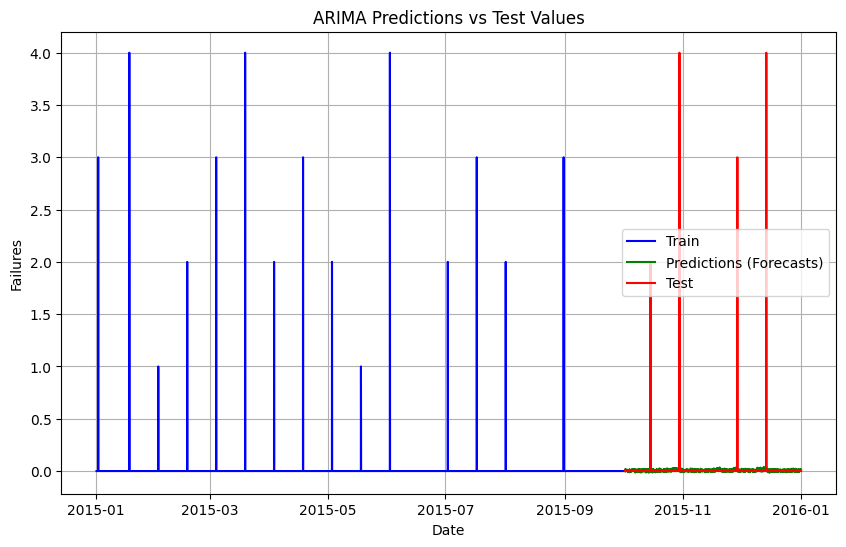

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting training data and predictions as forecasts
plt.plot(train['datetime_new'], train['failure'], label='Train', color='blue')
plt.plot(test['datetime_new'], y_pred, label='Predictions (Forecasts)', color='green')

# Plotting test data and predictions
plt.plot(test['datetime_new'], test['failure'], label='Test', color='red')
plt.plot(test['datetime_new'], y_pred, linestyle='--', color='green')

plt.xlabel('Date')
plt.ylabel('Failures')
plt.title('ARIMA Predictions vs Test Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
temp_fail_df['failure'].unique()

array([3, 4, 1, 2])

In [ ]:
new_df = pd.merge(tele_df_98, fail_dfs[98][['failure', 'datetime_new']], on='datetime_new', how='left')

In [ ]:
new_df.to_csv('test_1.csv')

In [ ]:
new_df

,datetime,machineID,volt,rotate,pressure,vibration,datetime_new,failure
0,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,2015-01-01 06:00:00,NaN
1,2015-01-01 07:00:00,99,153.667693,441.288719,128.011446,39.271527,2015-01-01 07:00:00,NaN
2,2015-01-01 08:00:00,99,178.319255,512.612661,128.526147,42.975412,2015-01-01 08:00:00,NaN
3,2015-01-01 09:00:00,99,162.163821,493.356626,114.435754,40.044016,2015-01-01 09:00:00,NaN
4,2015-01-01 10:00:00,99,180.201336,550.512296,110.771891,43.054530,2015-01-01 10:00:00,NaN
...,...,...,...,...,...,...,...,...
8756,2016-01-01 02:00:00,99,166.719608,462.956239,101.251044,44.450916,2016-01-01 02:00:00,NaN
8757,2016-01-01 03:00:00,99,168.434193,462.373730,98.379062,35.391502,2016-01-01 03:00:00,NaN
8758,2016-01-01 04:00:00,99,191.505730,418.940906,101.018747,43.204243,2016-01-01 04:00:00,NaN
8759,2016-01-01 05:00:00,99,185.423810,416.284422,99.564561,38.006329,2016-01-01 05:00:00,NaN


In [ ]:
new_df['failure'].unique()

array([nan, 'comp3', 'comp4', 'comp1', 'comp2'], dtype=object)

In [ ]:
new_df=new_df.drop(columns='datetime_new')

In [ ]:
new_df.to_csv('data.csv')

In [ ]:
new_df

,datetime,machineID,volt,rotate,pressure,vibration,failure
0,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,NaN
1,2015-01-01 07:00:00,99,153.667693,441.288719,128.011446,39.271527,NaN
2,2015-01-01 08:00:00,99,178.319255,512.612661,128.526147,42.975412,NaN
3,2015-01-01 09:00:00,99,162.163821,493.356626,114.435754,40.044016,NaN
4,2015-01-01 10:00:00,99,180.201336,550.512296,110.771891,43.054530,NaN
...,...,...,...,...,...,...,...
8756,2016-01-01 02:00:00,99,166.719608,462.956239,101.251044,44.450916,NaN
8757,2016-01-01 03:00:00,99,168.434193,462.373730,98.379062,35.391502,NaN
8758,2016-01-01 04:00:00,99,191.505730,418.940906,101.018747,43.204243,NaN
8759,2016-01-01 05:00:00,99,185.423810,416.284422,99.564561,38.006329,NaN


In [ ]:
ann = Sequential()
    from sklearn.model_selection import train_test_split as tts
    A_train, A_test, b_train, b_test = tts(df[keys], df[dep], test_size = 0.3, random_state = 0)

    #adding the input and first hidden layer
    ann.add(Dense(16, activation='relu', kernel_initializer='glorot_uniform',input_dim=len(keys)))
    #adding second layer
    ann.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform'))
    #adding the output layer
    ann.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    ann.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
    ann.fit(A_train, b_train,
        batch_size=35,
        epochs=50,
        shuffle=True,
    )

    b_pred=ann.predict(A_test)
    for i in range(len(b_pred)):
        if b_pred[i] >= 0.5:
            b_pred[i] = 1
        else:
            b_pred[i] = 0